In [1]:
# import library
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
ff_matches = pd.read_excel('Fifa_world_cup_raw3.xlsx', sheet_name='All Matches')
# ff_defails = pd.read_excel(file_path, sheet_name='Match Details')

In [3]:
# data information
ff_matches.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900 entries, 0 to 899
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Unnamed: 0        900 non-null    int64 
 1   Year              900 non-null    int64 
 2   Stage             900 non-null    object
 3   Date              900 non-null    object
 4   Time              900 non-null    object
 5   Stadium           900 non-null    object
 6   Location          900 non-null    object
 7   Home Team         900 non-null    object
 8   HT Goals          900 non-null    int64 
 9   AT Goals          900 non-null    object
 10  Away Team         900 non-null    object
 11  Match Attendance  900 non-null    object
 12  MatchID           900 non-null    int64 
 13  Refer             899 non-null    object
dtypes: int64(4), object(10)
memory usage: 98.6+ KB


In [4]:
# ff_defails.info()

In [5]:
# drop the first columns since no use
ff_matches = ff_matches.drop(columns=ff_matches.columns[0])
# ff_defails = ff_defails.drop(columns=ff_defails.columns[0])

In [6]:
# convert Date to datetime type
ff_matches['Date'] = pd.to_datetime(ff_matches['Date'])#, format='%d %B %Y', exact=False)

In [7]:
# convert Time to datetime type
# ff_matches['Time'] = pd.to_datetime(ff_matches['Time'])

# # %%
# match_count_stadium_in_location = ff_matches.pivot_table(index='Location', columns='Year', values = 'Stadium', aggfunc='nunique', fill_value=0)


# # %%
# stadium_in_year = ff_matches.pivot_table(index='Year',values='Stadium',aggfunc='nunique', fill_value=0)
# # %%
# func = lambda x: round(x/x.sum()*100,2)
# stadium_in_year['Stadium(pct)'] = func(stadium_in_year['Stadium'])
# # %%
# fig, ax = plt.subplots(figsize=(11,6))
# graphs1 = ax.bar(np.arange(len(stadium_in_year)),stadium_in_year['Stadium(pct)'], tick_label=stadium_in_year.index, width=0.8, color='#af0b1e', align='center')
# plt.xticks(rotation=45)
# ax.spines['top'].set_visible(False)
# ax.spines['right'].set_visible(False)
# ax.set_ylabel('Numbers of Stadium')

# ax.tick_params(bottom=False)

# year = list(stadium_in_year.index)


# for i, p in enumerate(graphs1):
#     x, y = p.get_xy()
#     width_p = p.get_width()
#     height_p = p.get_height()
#     plt.text(x=x+width_p/2, y=height_p/2.7, s=str(stadium_in_year['Stadium(pct)'][year[i]])+'%', ha = 'center', rotation=90)

In [8]:
# create column Winstats, New HT Goals, New AT Goals
ff_matches['Winstats'] = 0
ff_matches['New HT Goals'] = ff_matches['HT Goals'].copy()
ff_matches['New AT Goals'] = ff_matches['AT Goals'].copy()

In [9]:
# replace non-numeric chatacters from New HT Goals, New AT Goals
ff_matches[['New AT Goals','New HT Goals']] = ff_matches[['New AT Goals','New HT Goals']].replace(to_replace='\D+', value='', regex=True)

In [10]:
# clean up leading and ending spaces
ff_matches = ff_matches.replace(to_replace=r'^\\s+', value='', regex=True)
ff_matches = ff_matches.replace(to_replace=r'\\s+$', value='', regex=True)

In [11]:
# astype the 2 columns above to 'int64' dtype
ff_matches[['New HT Goals', 'New AT Goals']] = ff_matches[['New HT Goals', 'New AT Goals']].astype('int64')

In [12]:
# set Winstats = 1 if values in New HT Goals larger than New AT Goals
ff_matches['Winstats'][ff_matches['New HT Goals']-ff_matches['New AT Goals']>0] = 1

<ipython-input-12-ed723b5d971d>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ff_matches['Winstats'][ff_matches['New HT Goals']-ff_matches['New AT Goals']>0] = 1


In [13]:
# set Winstats = -1 if values in New HT Goals smaller than New AT Goals
ff_matches['Winstats'][ff_matches['New HT Goals']-ff_matches['New AT Goals']< 0] = -1

<ipython-input-13-fc3a89d04875>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ff_matches['Winstats'][ff_matches['New HT Goals']-ff_matches['New AT Goals']< 0] = -1


In [14]:
# retrieve attended country
countries_list = list(set(pd.concat([ff_matches['Home Team'], ff_matches['Away Team']], axis=0)))

In [15]:
# Generate winrate of countries_list
win_dict = {}
for country in countries_list:    
    for i, name in enumerate(ff_matches['Home Team']):
        if country == name:
            if country not in win_dict:
                win_dict[country] = {'win':0, 'draw': 0, 'lose': 0}
            if ff_matches.loc[i, 'Winstats'] == 1:
                win_dict[country]['win'] += 1
            elif ff_matches.loc[i, 'Winstats'] == -1:
                win_dict[country]['lose'] += 1
            elif ff_matches.loc[i, 'Winstats'] == 0:
                win_dict[country]['draw'] += 1
    for i, name in enumerate(ff_matches['Away Team']):
        if country == name:
            if country not in win_dict:
                win_dict[country] = {'win':0, 'draw': 0, 'lose': 0}
            if ff_matches.loc[i, 'Winstats'] == -1:
                win_dict[country]['win'] += 1
            elif ff_matches.loc[i, 'Winstats'] == 1:
                win_dict[country]['lose'] += 1
            elif ff_matches.loc[i, 'Winstats'] == 0:
                win_dict[country]['draw'] += 1

In [16]:
# create df_win_by_country
df_win_of_country = pd.DataFrame(win_dict).T

In [17]:
# create columns total in df_win_by_country
df_win_of_country['total'] = df_win_of_country.sum(axis=1)

In [18]:
def percent(element):
    return round(element/df_win_of_country['total'],3)
    
df_winrate_of_country = df_win_of_country.apply(percent)

In [19]:
# create top 10 country by winrate
top_10_winrate_country = df_winrate_of_country.sort_values(by='win', ascending=False).head(10).drop(columns='total')

In [20]:
# list(top_10_winrate_country['win'])
# [i for i in top_10_winrate_country['win']]
# tuple(top_10_winrate_country.index)

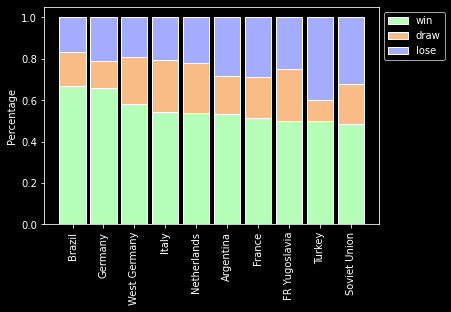

In [21]:
# create 100% stacked bar
# prepair data in percentage
df=top_10_winrate_country.copy()
r = [0,1,2,3,4,5,6,7,8,9]
winBars = list(df['win'])
drawBars = list(df['draw'])
loseBars = list(df['lose'])

# plot
barWidth = 0.85
names = tuple(df.index)

# Create green Bars
plt.bar(r, winBars, color='#b5ffb9', edgecolor='white', width=barWidth, label="win")
# Create orange Bars
plt.bar(r, drawBars, bottom=winBars, color='#f9bc86', edgecolor='white', width=barWidth, label="draw")
# Create blue Bars
plt.bar(r, loseBars, bottom=[i+j for i,j in zip(winBars, drawBars)], color='#a3acff', edgecolor='white', width=barWidth, label="lose")
 
# Custom x axis
plt.xticks(r, names, rotation=90)
plt.ylabel("Percentage")
 
# Add a legend
plt.legend(loc='upper left', bbox_to_anchor=(1,1), ncol=1)
 
# Show graphic
plt.show()

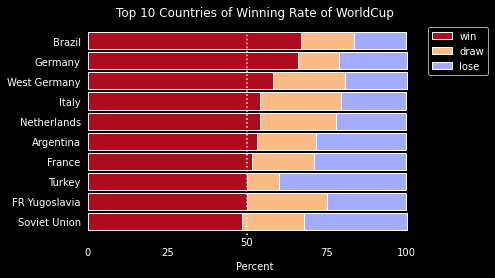

In [22]:
# create 100% stacked bar
# prepair data in percentage
df=top_10_winrate_country.sort_values(by='win', ascending=True).copy()
r = [0,1,2,3,4,5,6,7,8,9]
winBars = list(df['win']*100)
drawBars = list(df['draw']*100)
loseBars = list(df['lose']*100)

# plot info
barHeight = 0.85
names = tuple(df.index)
fig, ax = plt.subplots()
# create win Bars
ax.barh(r, winBars, color='#af0b1e', edgecolor='white', height=barHeight, label="win")
# create draw Bars
ax.barh(r, drawBars, left=winBars, color='#f9bc86', edgecolor='white', height=barHeight, label="draw")
# create lose Bars
ax.barh(r, loseBars, left=[i+j for i,j in zip(winBars, drawBars)], color='#a3acff', edgecolor='white', height=barHeight, label="lose")
 
# custom x axis
plt.yticks(r, names) # set the name of each Bar
ax.set_xticks([0,25,75,100]) # overwrite the xticks at the bottom
plt.tick_params(bottom=0, left=0) # disable the tick from bottom and left side
plt.xlabel("Percent")

for pos in ['top', 'left', 'right', 'bottom']:
    ax.spines[pos].set_visible(0)
 
# add a legend
ax.legend(loc='upper left', bbox_to_anchor=(1,1), ncol=1)
 
# add a line
ax.axvline(x=50, ls=':', color = 'white', ymin=0.02, ymax=0.95)
ax.text(x=50, y=-1.2, s='50', ha='center')
ax.set_title(label='Top 10 Countries of Winning Rate of WorldCup')

# show graph
plt.show()